## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the train.csv dataset (train data)

In [2]:
raw_data = pd.read_csv('train.csv')
raw_data.head(5)

real_data = pd.read_csv('test.csv')

In [3]:
real_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# PasssengerId -> unique identifier
# Survived -> targets for prediction
# Pclass -> pclass: A proxy for socio-economic status (SES)
	# 1st = Upper
	# 2nd = Middle
	# 3rd = Lower
# SibSp: number of Siblings and Spouse
# Parch: number of Parent / Children
# Ticket: ticketNumber
# Fare: Passenger Fare
# Cabin: Cabin Number
# Embarked: Port of embarkation

In [5]:
# Drop the PassengerId columns since it has no value on predicting the chance of survive
raw_data = raw_data.drop(['PassengerId'], axis=1)

passengerID = real_data['PassengerId']
real_data = real_data.drop(['PassengerId'], axis=1)

In [6]:
raw_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
raw_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# Explore the inputs
raw_data.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
# Drop the Cabin column since it has a lot of missing values (80 %) and the unique percentage is high (72 %)
# Drop the Ticket column sicne the unique percentage is also high too
# Drop the Name column since it is a unique identifier, hence no value of prediction
data = raw_data.drop(['Cabin', 'Ticket', 'Name'], axis=1)

real_data = real_data.drop(['Cabin', 'Ticket', 'Name'], axis=1)

In [10]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Dealing with missing values

In [11]:
data.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


In [12]:
# get number of rows in dataset
len(data)

891

In [13]:
# We can see that Age is a Numerical Value and has some missing values and it's slightly large, 
# hence it's best to replace it with the mean values
age_mean_values = np.mean(data['Age'])
age_mean_values

29.69911764705882

In [14]:
# Fill missing values in `Age` column with its mean
data['Age'] = data['Age'].fillna(age_mean_values)

# With test data, Fare has a na value -> fillna 
real_data['Age'] = real_data['Age'].fillna(np.mean(real_data['Age']))
real_data['Fare'] = real_data['Fare'].fillna(np.mean(real_data['Fare']))

In [15]:
# Drop missing values in `Embark` column since it's so minimal
data = data.dropna()

In [16]:
# See the dataset overview once again
data.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889,889.000000,889.000000,889.000000,889.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.382452,2.311586,NaN,29.653446,0.524184,0.382452,32.096681,NaN
std,0.486260,0.834700,NaN,12.968366,1.103705,0.806761,49.697504,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.895800,NaN
50%,0.000000,3.000000,NaN,29.699118,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN


## Change supposed categorical columns which are numeric into categorical

In [17]:
data_no_missing_val = data.copy()

In [18]:
data_no_missing_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [19]:
# Mark the categorical columns as category
category_cols_name = ['Pclass', 'Sex', 'Embarked']
for col in category_cols_name:
    data_no_missing_val[col] = data_no_missing_val[col].astype('category', copy=False)
    real_data[col] = real_data[col].astype('category', copy=False)

In [20]:
data_no_missing_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    int64   
 1   Pclass    889 non-null    category
 2   Sex       889 non-null    category
 3   Age       889 non-null    float64 
 4   SibSp     889 non-null    int64   
 5   Parch     889 non-null    int64   
 6   Fare      889 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(3), float64(2), int64(3)
memory usage: 44.7 KB


In [21]:
data_no_missing_val.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.0,889,889.000000,889.000000,889.000000,889.000000,889
unique,NaN,3.0,2,NaN,NaN,NaN,NaN,3
top,NaN,3.0,male,NaN,NaN,NaN,NaN,S
freq,NaN,491.0,577,NaN,NaN,NaN,NaN,644
mean,0.382452,NaN,NaN,29.653446,0.524184,0.382452,32.096681,NaN
std,0.486260,NaN,NaN,12.968366,1.103705,0.806761,49.697504,NaN
min,0.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,NaN,22.000000,0.000000,0.000000,7.895800,NaN
50%,0.000000,NaN,NaN,29.699118,0.000000,0.000000,14.454200,NaN
75%,1.000000,NaN,NaN,35.000000,1.000000,0.000000,31.000000,NaN


## Exploring the PDFs

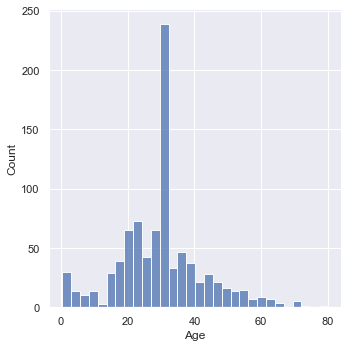

In [22]:
sns.displot(data_no_missing_val['Age'])

In [23]:
# We can see that there is some outliers on the right side and it's not much, hence we could drop some 
q = data_no_missing_val['Age'].quantile(0.995)
data_1 = data_no_missing_val[data_no_missing_val['Age'] < q]
data_1.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,884.000000,884.0,884,884.000000,884.000000,884.000000,884.000000,884
unique,NaN,3.0,2,NaN,NaN,NaN,NaN,3
top,NaN,3.0,male,NaN,NaN,NaN,NaN,S
freq,NaN,489.0,572,NaN,NaN,NaN,NaN,642
mean,0.383484,NaN,NaN,29.406577,0.527149,0.384615,32.131523,NaN
std,0.486510,NaN,NaN,12.578170,1.106118,0.808527,49.820974,NaN
min,0.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,NaN,22.000000,0.000000,0.000000,7.917700,NaN
50%,0.000000,NaN,NaN,29.699118,0.000000,0.000000,14.454200,NaN
75%,1.000000,NaN,NaN,35.000000,1.000000,0.000000,30.771850,NaN


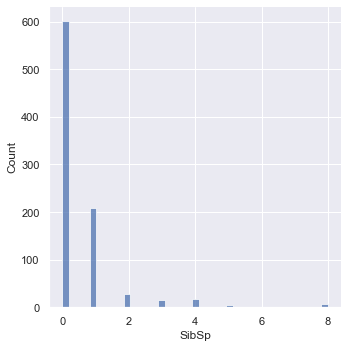

In [24]:
sns.displot(data_1['SibSp'])

In [25]:
q = data_1['SibSp'].quantile(0.99)
data_2 = data_1[data_1['SibSp'] < q]
data_2.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,872.000000,872.0,872,872.000000,872.000000,872.000000,872.000000,872
unique,NaN,3.0,2,NaN,NaN,NaN,NaN,3
top,NaN,3.0,male,NaN,NaN,NaN,NaN,S
freq,NaN,477.0,564,NaN,NaN,NaN,NaN,630
mean,0.388761,NaN,NaN,29.514358,0.441514,0.362385,31.746463,NaN
std,0.487749,NaN,NaN,12.573995,0.818147,0.791376,50.036720,NaN
min,0.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,NaN,22.000000,0.000000,0.000000,7.895800,NaN
50%,0.000000,NaN,NaN,29.699118,0.000000,0.000000,14.254150,NaN
75%,1.000000,NaN,NaN,35.000000,1.000000,0.000000,30.017700,NaN


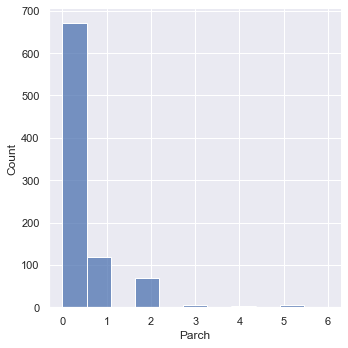

In [26]:
sns.displot(data_2['Parch'])

In [27]:
q = data_2['Parch'].quantile(0.99)
data_3 = data_2[data_2['Parch'] < q]
data_3.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,862.000000,862.0,862,862.000000,862.000000,862.000000,862.000000,862
unique,NaN,3.0,2,NaN,NaN,NaN,NaN,3
top,NaN,3.0,male,NaN,NaN,NaN,NaN,S
freq,NaN,468.0,561,NaN,NaN,NaN,NaN,621
mean,0.392111,NaN,NaN,29.372993,0.438515,0.312065,31.477252,NaN
std,0.488505,NaN,NaN,12.544811,0.820924,0.638536,49.699623,NaN
min,0.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,NaN,22.000000,0.000000,0.000000,7.895800,NaN
50%,0.000000,NaN,NaN,29.699118,0.000000,0.000000,13.645850,NaN
75%,1.000000,NaN,NaN,35.000000,1.000000,0.000000,30.000000,NaN


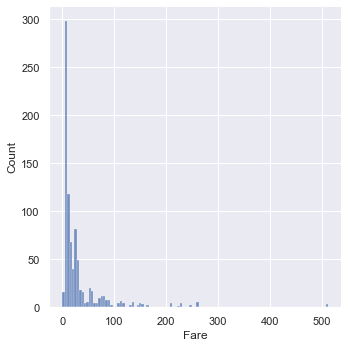

In [28]:
sns.displot(data_3['Fare'])

In [29]:
q = data_3['Fare'].quantile(0.99)
data_4 = data_3[data_3['Fare'] < q]
data_4.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,852.000000,852.0,852,852.000000,852.000000,852.000000,852.000000,852
unique,NaN,3.0,2,NaN,NaN,NaN,NaN,3
top,NaN,3.0,male,NaN,NaN,NaN,NaN,S
freq,NaN,468.0,557,NaN,NaN,NaN,NaN,618
mean,0.387324,NaN,NaN,29.383239,0.428404,0.300469,27.919732,NaN
std,0.487425,NaN,NaN,12.574540,0.807306,0.627494,35.317779,NaN
min,0.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,NaN,NaN,22.000000,0.000000,0.000000,7.895800,NaN
50%,0.000000,NaN,NaN,29.699118,0.000000,0.000000,13.208350,NaN
75%,1.000000,NaN,NaN,35.000000,1.000000,0.000000,29.125000,NaN


In [30]:
data_no_dummies = data_4.copy()

## Creating dummies for categorical variables

In [31]:
data_with_dummies = pd.get_dummies(data_no_dummies, drop_first=True)

real_data_with_dummies = pd.get_dummies(real_data, drop_first=True)

In [32]:
data_with_dummies.head(5)

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


### Rearange the columns for a bit

In [33]:
data_with_dummies.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [34]:
# Rearrange the columns
columns = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Survived']
data_rearranged = data_with_dummies[columns]

# The test data has no column `Survived`
real_columns = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3',
       'Sex_male', 'Embarked_Q', 'Embarked_S']
real_data_arranged = real_data_with_dummies[real_columns]

data_rearranged.head(5)

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Survived
0,22.0,1,0,7.2500,0,1,1,0,1,0
1,38.0,1,0,71.2833,0,0,0,0,0,1
2,26.0,0,0,7.9250,0,1,0,0,1,1
3,35.0,1,0,53.1000,0,0,0,0,1,1
4,35.0,0,0,8.0500,0,1,1,0,1,0


## Checking the balance of the dataset

In [35]:
# Calculating the survival rate
np.sum(data_rearranged['Survived'] == 1) / data_rearranged['Survived'].shape[0]

0.3873239436619718

### Balance the dataset method
https://miro.medium.com/max/725/0*FeIp1t4uEcW5LmSM.png

In [36]:
# It's 61-39 so it's kinda not balance, we would want 55-45 or 50-50
# In this case let's undersampling the dataset since it's kinda easy :)
np.sum(data_rearranged['Survived'] == 1), np.sum(data_rearranged['Survived'] == 0)

(330, 522)

### Undersampling the data

In [37]:
not_survived_indices = data_rearranged[data_rearranged['Survived'] == 0].index
print(not_survived_indices)

Int64Index([  0,   4,   5,   6,   7,  12,  14,  16,  18,  20,
            ...
            876, 877, 878, 881, 882, 883, 884, 886, 888, 890],
           dtype='int64', length=522)


In [38]:
survived_indices = data_rearranged[data_rearranged['Survived'] == 1].index
print(survived_indices)

Int64Index([  1,   2,   3,   8,   9,  10,  11,  15,  17,  19,
            ...
            865, 866, 869, 871, 874, 875, 879, 880, 887, 889],
           dtype='int64', length=330)


In [39]:
np.random.seed(seed=42)
random_not_survived_indices = np.random.choice(not_survived_indices, len(survived_indices), replace=False,)
print(len(random_not_survived_indices))

330


In [40]:
under_sample_indices = np.concatenate([random_not_survived_indices, survived_indices])

In [41]:
under_sample_data = data_rearranged.loc[under_sample_indices]

In [42]:
under_sample_data.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Survived
746,16.0,1,1,20.2500,0,1,1,0,1,0
757,18.0,0,0,11.5000,1,0,1,0,1,0
14,14.0,0,0,7.8542,0,1,0,0,1,0
312,26.0,1,1,26.0000,1,0,0,0,1,0
134,25.0,0,0,13.0000,1,0,1,0,1,0


## Standardize the data

In [43]:
under_sample_data.columns.values

array(['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'Survived'], dtype=object)

In [44]:
unscaled_cols = ['Age', 'Fare']
unscaled_data = under_sample_data[unscaled_cols]

unscaled_real_data = real_data_with_dummies[unscaled_cols]

In [45]:
from sklearn.preprocessing import StandardScaler
titanic_scaler = StandardScaler()

real_scaler = StandardScaler()

In [46]:
titanic_scaler.fit(unscaled_data)

real_scaler.fit(unscaled_real_data)

StandardScaler()

In [47]:
scaled_inputs = titanic_scaler.transform(unscaled_data)

real_scaled_inputs = real_scaler.transform(unscaled_real_data)

scaled_inputs

array([[-1.04050042, -0.26557442],
       [-0.88265599, -0.50019367],
       [-1.19834484, -0.5979508 ],
       ...,
       [-0.33020051, -0.11139605],
       [-0.80373378, -0.00414153],
       [-0.2512783 , -0.00414153]])

In [48]:
# loc -> rows in pandas loc[:]
# iloc -> rows & columns in pandas -> iloc[:, :]
# for list [:,:]
scaled_data = under_sample_data.copy()
scaled_data.drop(['Age', 'Fare'], axis=1)
scaled_data['Age'] = scaled_inputs[:, 0]
scaled_data['Fare'] = scaled_inputs[:, 1]

real_scaled_data = real_data_with_dummies.copy()
real_scaled_data.drop(['Age', 'Fare'], axis=1)
real_scaled_data['Age'] = real_scaled_inputs[:, 0]
real_scaled_data['Fare'] = real_scaled_inputs[:, 1]

In [49]:
scaled_data.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Survived
746,-1.040500,1,1,-0.265574,0,1,1,0,1,0
757,-0.882656,0,0,-0.500194,1,0,1,0,1,0
14,-1.198345,0,0,-0.597951,0,1,0,0,1,0
312,-0.251278,1,1,-0.111396,1,0,0,0,1,0
134,-0.330201,0,0,-0.459973,1,0,1,0,1,0


In [50]:
real_scaled_data.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.334993,0,0,-0.498407,0,1,1,1,0
1,1.325530,1,0,-0.513274,0,1,0,0,1
2,2.514175,0,0,-0.465088,1,0,1,1,0
3,-0.259330,0,0,-0.483466,0,1,1,0,1
4,-0.655545,1,1,-0.418471,0,1,0,0,1


## Split data into train, test and shuffle the data

In [51]:
# Import the relevant module
from sklearn.model_selection import train_test_split

In [52]:
scaled_inputs = scaled_data.iloc[:, :-2]
targets = scaled_data.iloc[:, -1]

real_scaled_inputs = real_scaled_data.iloc[:, :-1]

In [53]:
train_test_split(scaled_inputs, targets)

[          Age  SibSp  Parch      Fare  Pclass_2  Pclass_3  Sex_male  \
 334  0.040664      1      0  2.775091         0         0         0   
 426 -0.093434      1      0 -0.111396         1         0         0   
 881  0.301177      0      0 -0.596835         0         1         1   
 505 -0.882656      1      0  2.111454         0         0         1   
 653  0.040664      0      0 -0.598621         0         1         0   
 ..        ...    ...    ...       ...       ...       ...       ...   
 446 -1.277267      0      1 -0.285685         1         0         0   
 658 -0.488045      0      0 -0.459973         1         0         1   
 640 -0.724812      0      0 -0.597951         0         1         1   
 730 -0.014512      0      0  4.858175         0         0         0   
 868  0.040664      0      0 -0.553821         0         1         1   
 
      Embarked_Q  
 334           0  
 426           0  
 881           0  
 505           0  
 653           1  
 ..          ...  
 

In [54]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, test_size = 0.2, random_state = 42)

In [55]:
print(x_train.shape, y_train.shape)

(528, 8) (528,)


In [56]:
print(x_test.shape, y_test.shape)

(132, 8) (132,)


## Logistic Regression with sklearn

In [57]:
# import the LogReg model from sklearn
from sklearn.linear_model import LogisticRegression

# import the 'metrics' module, which includes important metrics we may want to use
from sklearn import metrics

### Train the model

In [58]:
# create a logistic regression object
reg = LogisticRegression()

In [59]:
# fit our train inputs
# that is basically the whole training part of the machine learning
reg.fit(x_train,y_train)

LogisticRegression()

In [60]:
# assess the train accuracy of the model
reg.score(x_train,y_train)

0.7935606060606061

### Finding the intercept and coefficients


In [61]:
reg.intercept_

array([2.87975786])

In [62]:
reg.coef_

array([[-0.4547772 , -0.19726962, -0.01749174,  0.27816289, -0.84845009,
        -1.36799084, -2.75763808, -0.0812227 ]])

In [63]:
# check what were the names of our columns
scaled_inputs.columns.values

array(['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3',
       'Sex_male', 'Embarked_Q'], dtype=object)

In [64]:
# save the names of the columns in an ad-hoc variable
feature_name = scaled_inputs.columns.values

In [65]:
# use the coefficients from this table (they will be exported later and will be used in Tableau)
# transpose the model coefficients (model.coef_) and throws them into a df (a vertical organization, so that they can be
# multiplied by certain matrices later) 
summary_table = pd.DataFrame (columns=['Feature name'], data = feature_name)

# add the coefficient values to the summary table
summary_table['Coefficient'] = np.transpose(reg.coef_)

# display the summary table
summary_table

,Feature name,Coefficient
0,Age,-0.454777
1,SibSp,-0.197270
2,Parch,-0.017492
3,Fare,0.278163
4,Pclass_2,-0.848450
5,Pclass_3,-1.367991
6,Sex_male,-2.757638
7,Embarked_Q,-0.081223


In [66]:
# do a little Python trick to move the intercept to the top of the summary table
# move all indices by 1
summary_table.index = summary_table.index + 1

# add the intercept at index 0
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]

# sort the df by index
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficient
0,Intercept,2.879758
1,Age,-0.454777
2,SibSp,-0.197270
3,Parch,-0.017492
4,Fare,0.278163
5,Pclass_2,-0.848450
6,Pclass_3,-1.367991
7,Sex_male,-2.757638
8,Embarked_Q,-0.081223


### Interpreting the coefficients

In [67]:
# create a new Series called: 'Odds ratio' which will show the.. odds ratio of each feature
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)

In [68]:
summary_table

,Feature name,Coefficient,Odds_ratio
0,Intercept,2.879758,17.809960
1,Age,-0.454777,0.634589
2,SibSp,-0.197270,0.820969
3,Parch,-0.017492,0.982660
4,Fare,0.278163,1.320701
5,Pclass_2,-0.848450,0.428078
6,Pclass_3,-1.367991,0.254618
7,Sex_male,-2.757638,0.063441
8,Embarked_Q,-0.081223,0.921988


In [69]:
# sort the table according to odds ratio
# note that by default, the sort_values method sorts values by 'ascending'
summary_table.sort_values('Odds_ratio', ascending=False)

,Feature name,Coefficient,Odds_ratio
0,Intercept,2.879758,17.809960
4,Fare,0.278163,1.320701
3,Parch,-0.017492,0.982660
8,Embarked_Q,-0.081223,0.921988
2,SibSp,-0.197270,0.820969
1,Age,-0.454777,0.634589
5,Pclass_2,-0.848450,0.428078
6,Pclass_3,-1.367991,0.254618
7,Sex_male,-2.757638,0.063441


In [70]:
scaled_inputs

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q
746,-1.040500,1,1,-0.265574,0,1,1,0
757,-0.882656,0,0,-0.500194,1,0,1,0
14,-1.198345,0,0,-0.597951,0,1,0,0
312,-0.251278,1,1,-0.111396,1,0,0,0
134,-0.330201,0,0,-0.459973,1,0,1,0
...,...,...,...,...,...,...,...,...
875,-1.119423,0,0,-0.614822,0,1,0,0
879,2.116388,0,1,1.421225,0,0,0,0
880,-0.330201,0,1,-0.111396,1,0,0,0
887,-0.803734,0,0,-0.004142,0,0,0,0


In [71]:
real_scaled_inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   SibSp       418 non-null    int64  
 2   Parch       418 non-null    int64  
 3   Fare        418 non-null    float64
 4   Pclass_2    418 non-null    uint8  
 5   Pclass_3    418 non-null    uint8  
 6   Sex_male    418 non-null    uint8  
 7   Embarked_Q  418 non-null    uint8  
dtypes: float64(2), int64(2), uint8(4)
memory usage: 14.8 KB


In [72]:
real_scaled_inputs

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q
0,0.334993,0,0,-0.498407,0,1,1,1
1,1.325530,1,0,-0.513274,0,1,0,0
2,2.514175,0,0,-0.465088,1,0,1,1
3,-0.259330,0,0,-0.483466,0,1,1,0
4,-0.655545,1,1,-0.418471,0,1,0,0
...,...,...,...,...,...,...,...,...
413,0.000000,0,0,-0.494448,0,1,1,0
414,0.691586,0,0,1.313753,0,0,0,0
415,0.651965,0,0,-0.508792,0,1,1,0
416,0.000000,0,0,-0.494448,0,1,1,0


In [73]:
output = reg.predict(real_scaled_inputs)

In [74]:
output_data = pd.DataFrame()
output_data['PassengerId'] = passengerID
output_data['Survived'] = output
output_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Check the results

In [75]:
# Read the true data given 
true_data = pd.read_csv('gender_submission.csv')

In [76]:
# Calculate the accuracy of prediction results
np.sum(output == true_data['Survived']) / true_data['Survived'].shape[0]

0.9330143540669856

In [77]:
output_data['Real Survived'] = true_data['Survived']

In [78]:
# Print all rows
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):print(output_data)

     PassengerId  Survived  Real Survived
0            892         0              0
1            893         1              1
2            894         0              0
3            895         0              0
4            896         1              1
5            897         0              0
6            898         1              1
7            899         0              0
8            900         1              1
9            901         0              0
10           902         0              0
11           903         0              0
12           904         1              1
13           905         0              0
14           906         1              1
15           907         1              1
16           908         0              0
17           909         0              0
18           910         1              1
19           911         1              1
20           912         0              0
21           913         0              0
22           914         1        

In [79]:
output_data.head(len(output_data))

,PassengerId,Survived,Real Survived
0,892,0,0
1,893,1,1
2,894,0,0
3,895,0,0
4,896,1,1
...,...,...,...
413,1305,0,0
414,1306,1,1
415,1307,0,0
416,1308,0,0


In [80]:
output_data.drop(['Real Survived'], axis=1)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### Export output to .csv file

In [81]:
output_data.to_csv('training_results.csv')